In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
# Read dataset
file_path = "E:/Uni/Thesis/Material/Dataset/archive/world_development_data_imputed.csv"
data = pd.read_csv(file_path, sep=',')

# Explore the data
print(data.head(5))
print(data.isna().sum())

     Year           Country   Region           SubRegion  SurfAreaSqKm  \
0  2000.0       Afghanistan     Asia       Southern Asia      652860.0   
1  2000.0             Malta   Europe     Southern Europe         320.0   
2  2000.0           Belgium   Europe      Western Europe       30530.0   
3  2000.0  Marshall Islands  Oceania          Micronesia         180.0   
4  2000.0        Mauritania   Africa  Sub-Saharan Africa     1030700.0   

     PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  ...  \
0  19542982.0    29.963329    1.443803  1.801248e+10   -5.206288  ...   
1    390087.0  1219.021875    0.645267  4.323339e+09   19.681791  ...   
2  10251250.0   338.548547    0.242518  2.367925e+11    3.716679  ...   
3     54224.0   301.244444    0.721838  1.153475e+08    1.354079  ...   
4   2695003.0     2.614731    2.799182  1.779521e+09   -3.918026  ...   

       GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
0  1.778669e+10    41.312634      17.178

In [3]:
# Preprocess data
americas_data = data[data['Region'] == 'Americas']
americas_data = americas_data.drop(columns=['Year', 'SurfAreaSqKm'])
americas_data = americas_data.select_dtypes(include=[np.number])

# Explore data
print(americas_data.head(5))
print(americas_data.isna().sum())


      PopTotal      PopDens  PopGrowth%           GDP  GDPGrowth%  \
6   97873442.0    50.347716    1.584551  7.079099e+11    4.942454   
14    264657.0   615.481395    0.184181  3.059500e+09    4.447190   
20    240406.0    10.539500    3.243729  1.116000e+09   13.005780   
25     61833.0  1145.055556    0.890209  3.480219e+09    9.317156   
43   3810605.0   429.605975    0.276559  6.170180e+10    3.271965   

    AdolFertRate  AgriValAdd%GDP  Exports%GDP  FertRate     FDINetBoP  ...  \
6         73.673        3.323086    25.406717    2.7160  1.838228e+10  ...   
14        53.139        1.995424    43.235823    1.7750  7.369694e+07  ...   
20        99.894       10.854144    43.727599    3.6340  2.956465e+07  ...   
25        33.190        0.668952    79.738097    1.7400  6.690000e+07  ...   
43        74.114        0.660110    62.341293    2.0485 -3.892719e+07  ...   

        GNIAtlas  Imports%GDP  IndValAdd%GDP  InflConsPric%  LifeExpBirth  \
6   6.142435e+11    27.025965      34.2

PopGrowth%         1.000000
UrbanPopGrowth%    0.822083
FertRate           0.425193
AdolFertRate       0.177729
MerchTrade%GDP     0.103607
GDPGrowth%         0.071242
Exports%GDP        0.064985
NetMigr            0.052651
AgriValAdd%GDP     0.005776
PopTotal          -0.006012
FDINetBoP         -0.014397
MortRateU5        -0.016214
IndValAdd%GDP     -0.032712
GNIAtlas          -0.036371
GDP               -0.036644
Imports%GDP       -0.037593
InflConsPric%     -0.048910
GNI/CapAtlas      -0.072133
LifeExpBirth      -0.120973
MobileSubs/100    -0.165275
PopDens           -0.291835
Name: PopGrowth%, dtype: float64


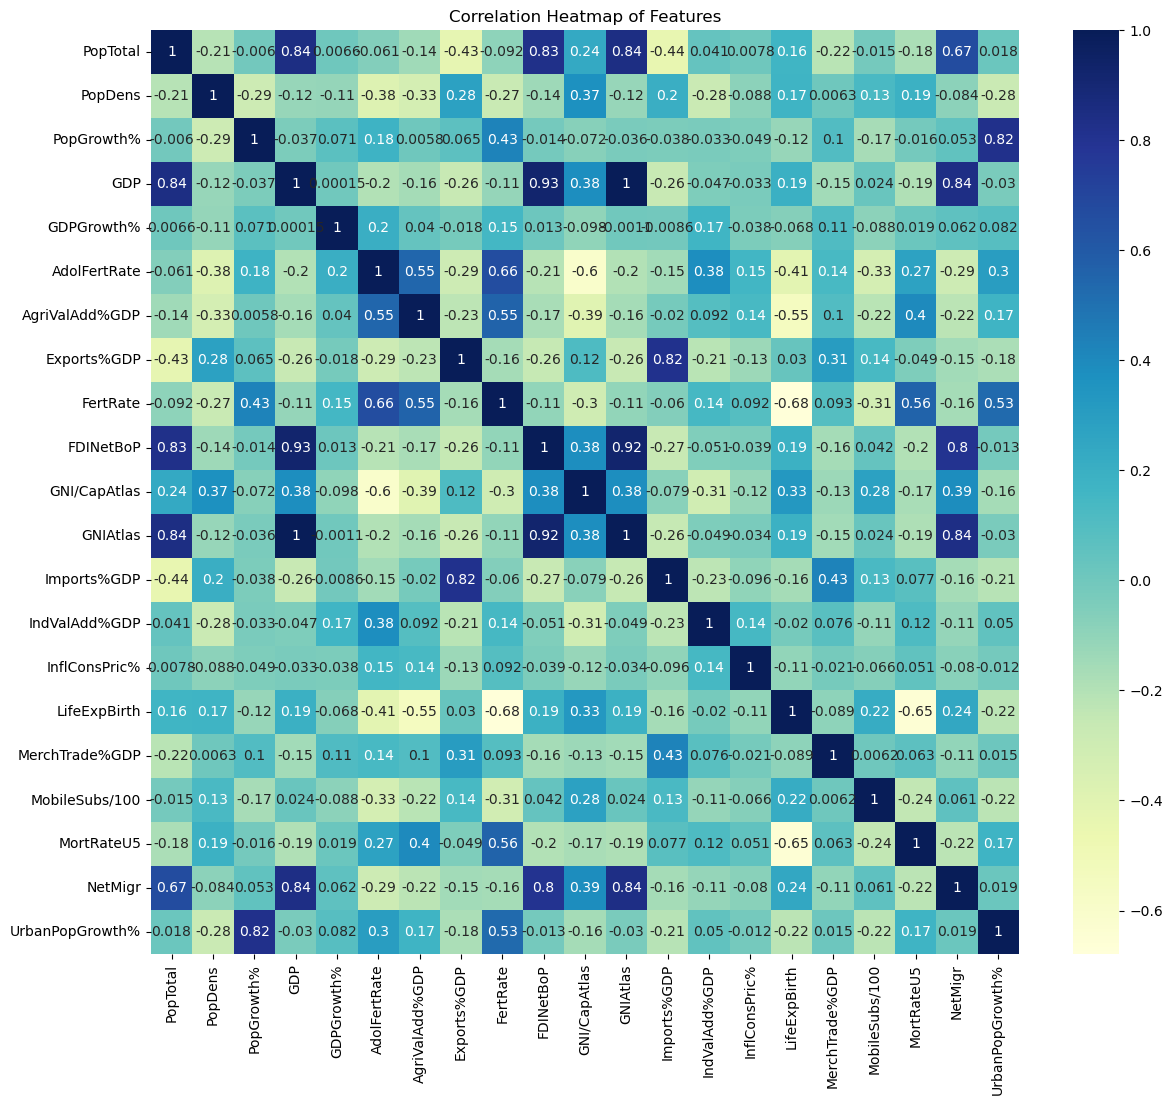

In [5]:
# Compute correlation matrix
americas_data_corr = americas_data.corr()
print(americas_data_corr['PopGrowth%'].sort_values(ascending=False))

# Plot correlation heatmap
plt.figure(figsize=(14, 12))
sns.heatmap(americas_data_corr, cmap="YlGnBu", annot=True)
plt.title("Correlation Heatmap of Features")
plt.savefig("Featurs_Correlation.png", dpi=300, bbox_inches='tight')
plt.show()

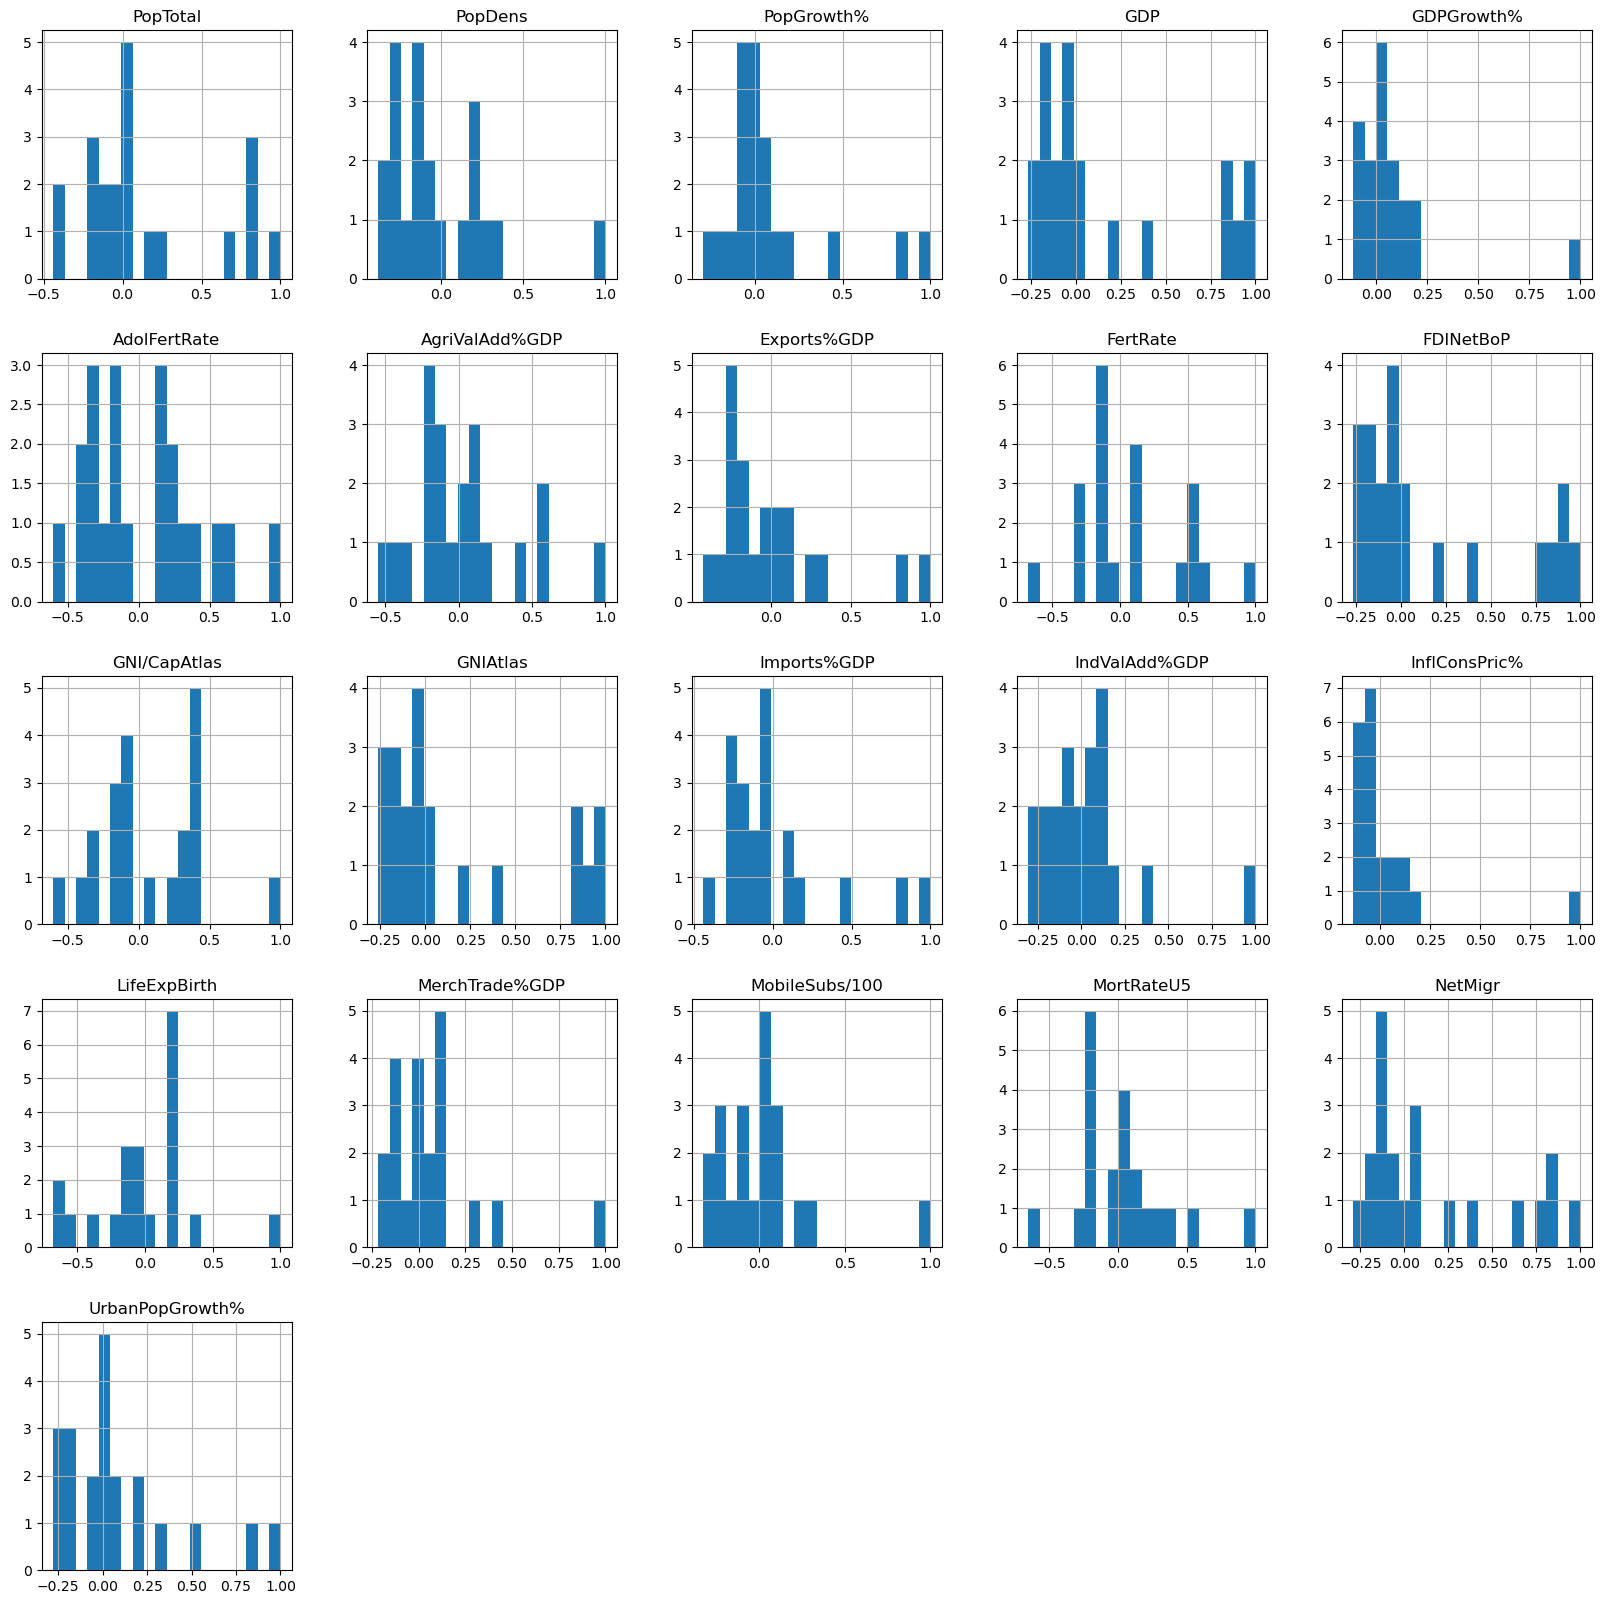

In [6]:
# Plot histograms
americas_data_corr.hist(figsize=(20, 20), bins=20)
plt.title("Features Histograms")
plt.savefig("Features_His.png")
plt.show()

C:\Users\nazno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


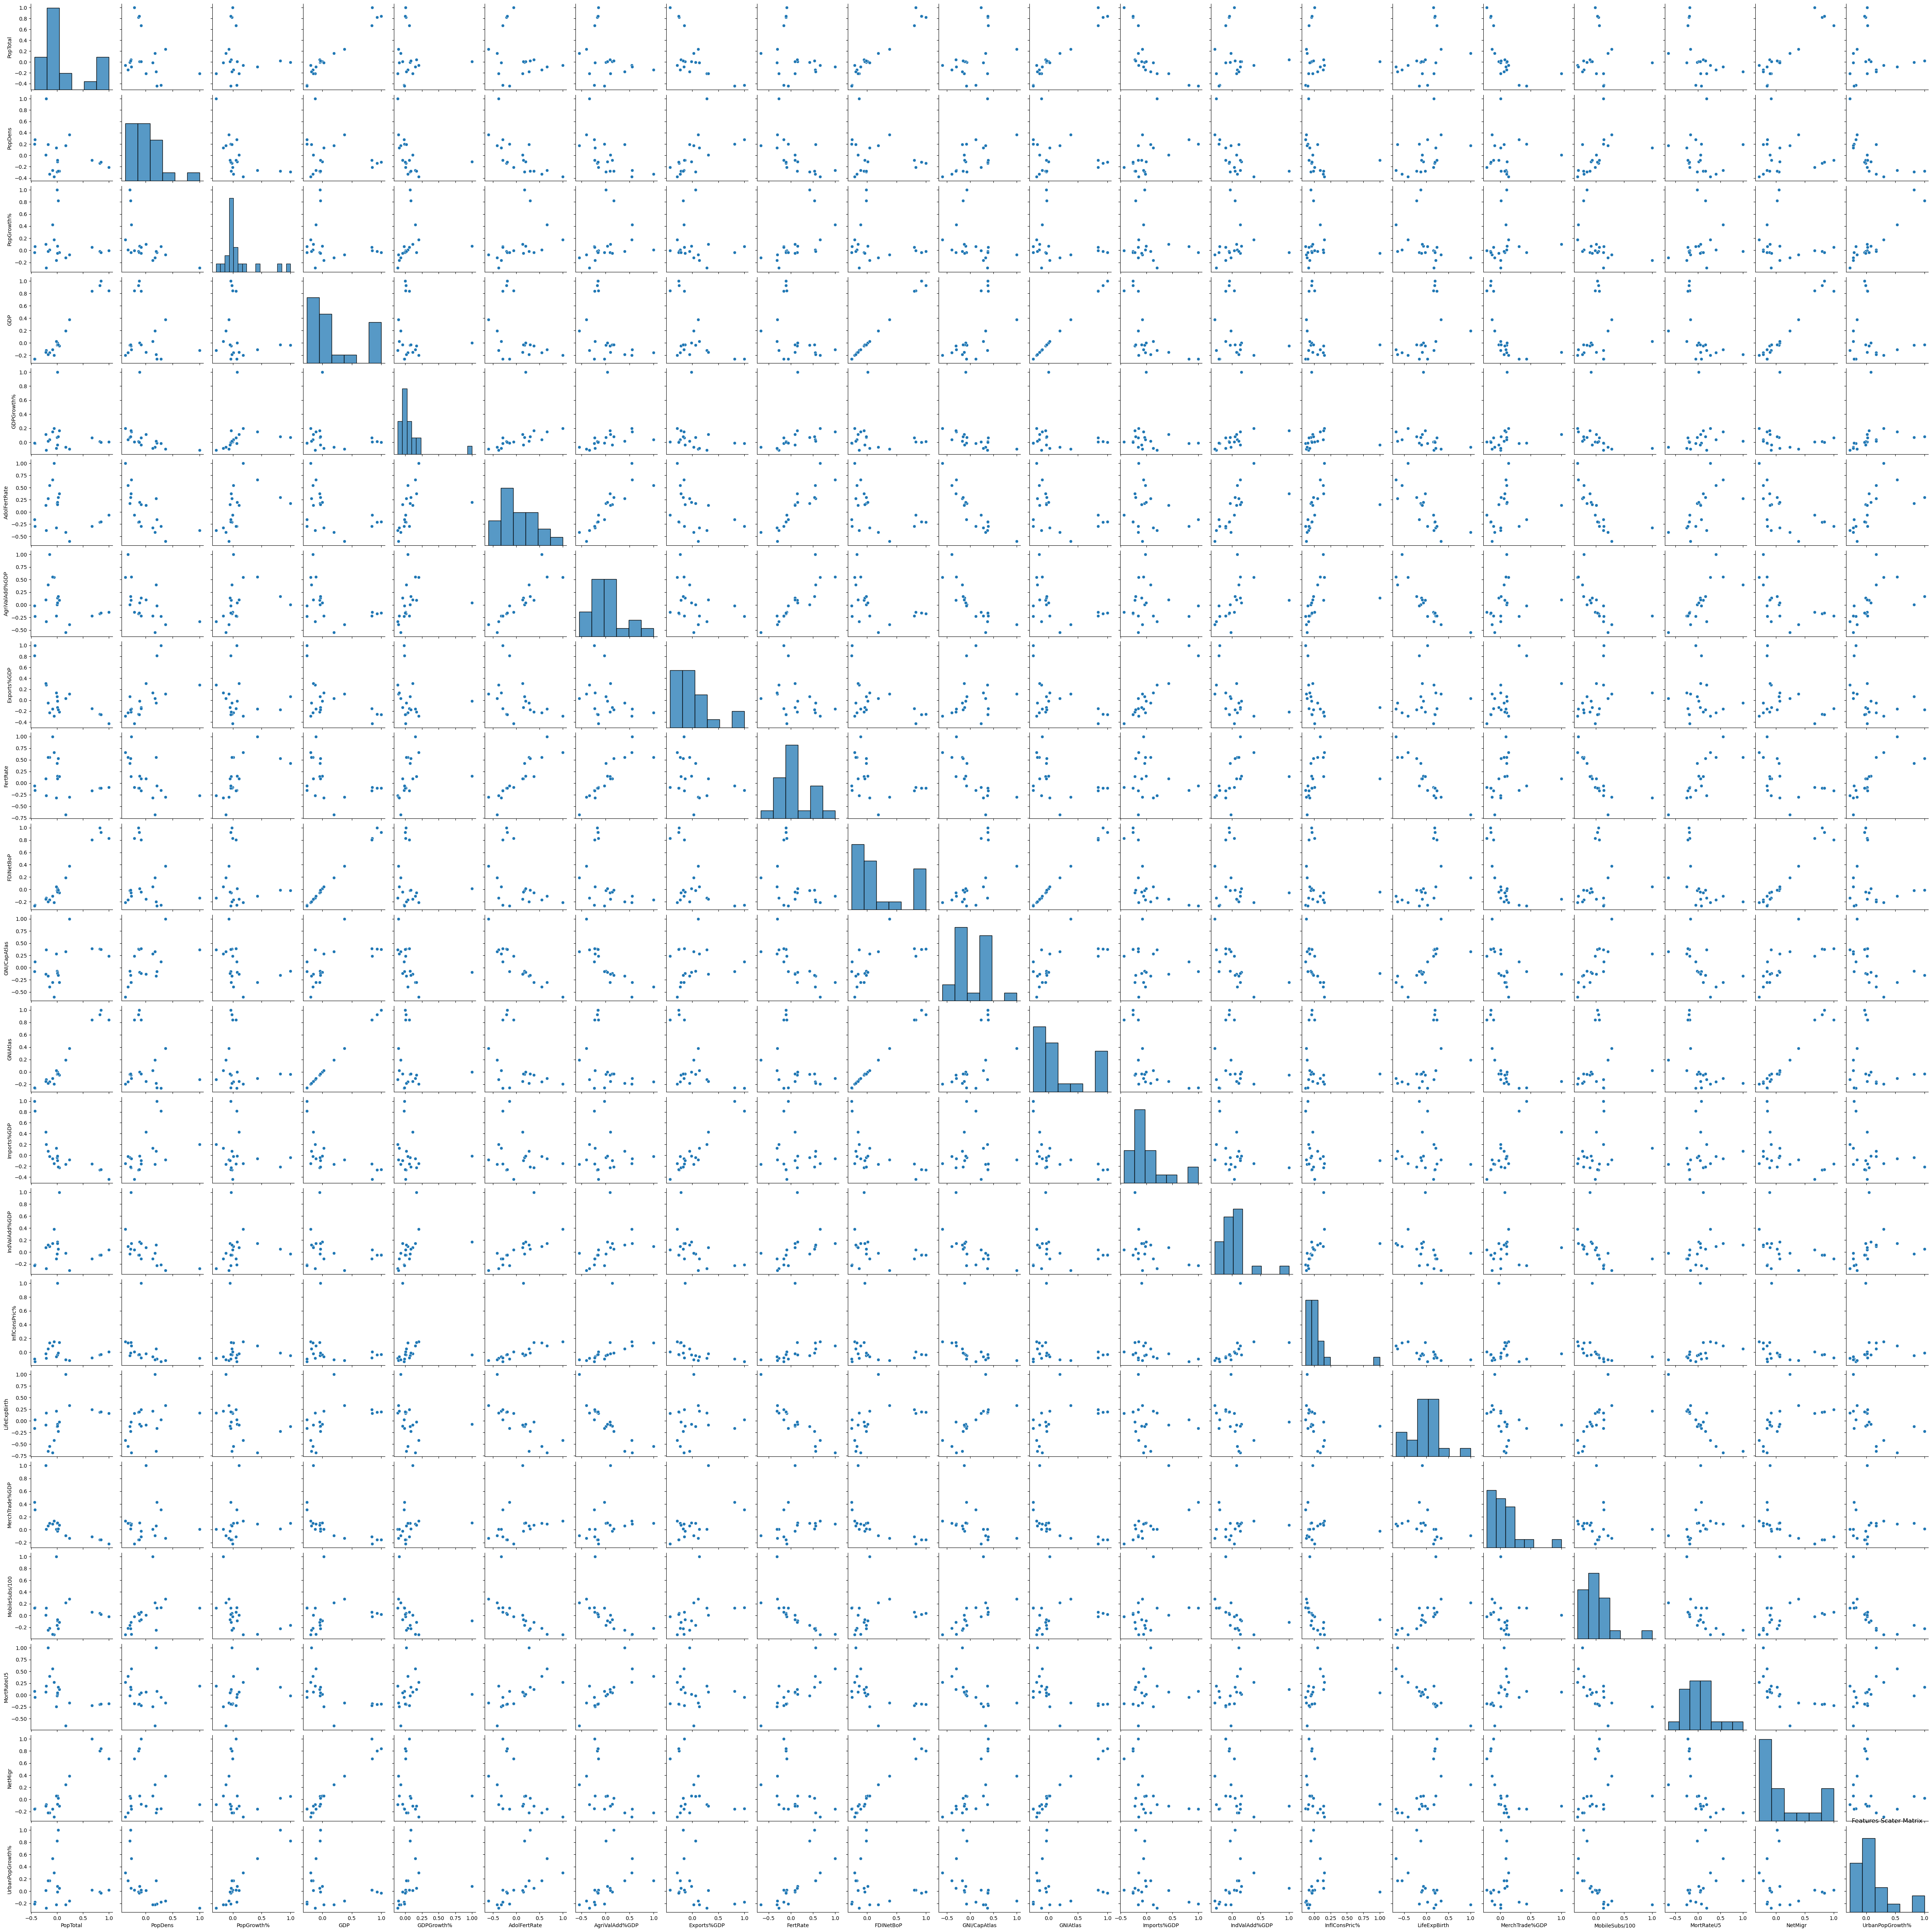

In [7]:
#Plot scatter matrix
sns.pairplot(americas_data_corr)
plt.title("Features Scater Matrix")
plt.savefig("Features_Scat.png", dpi = 300, bbox_inches = 'tight')
plt.show()

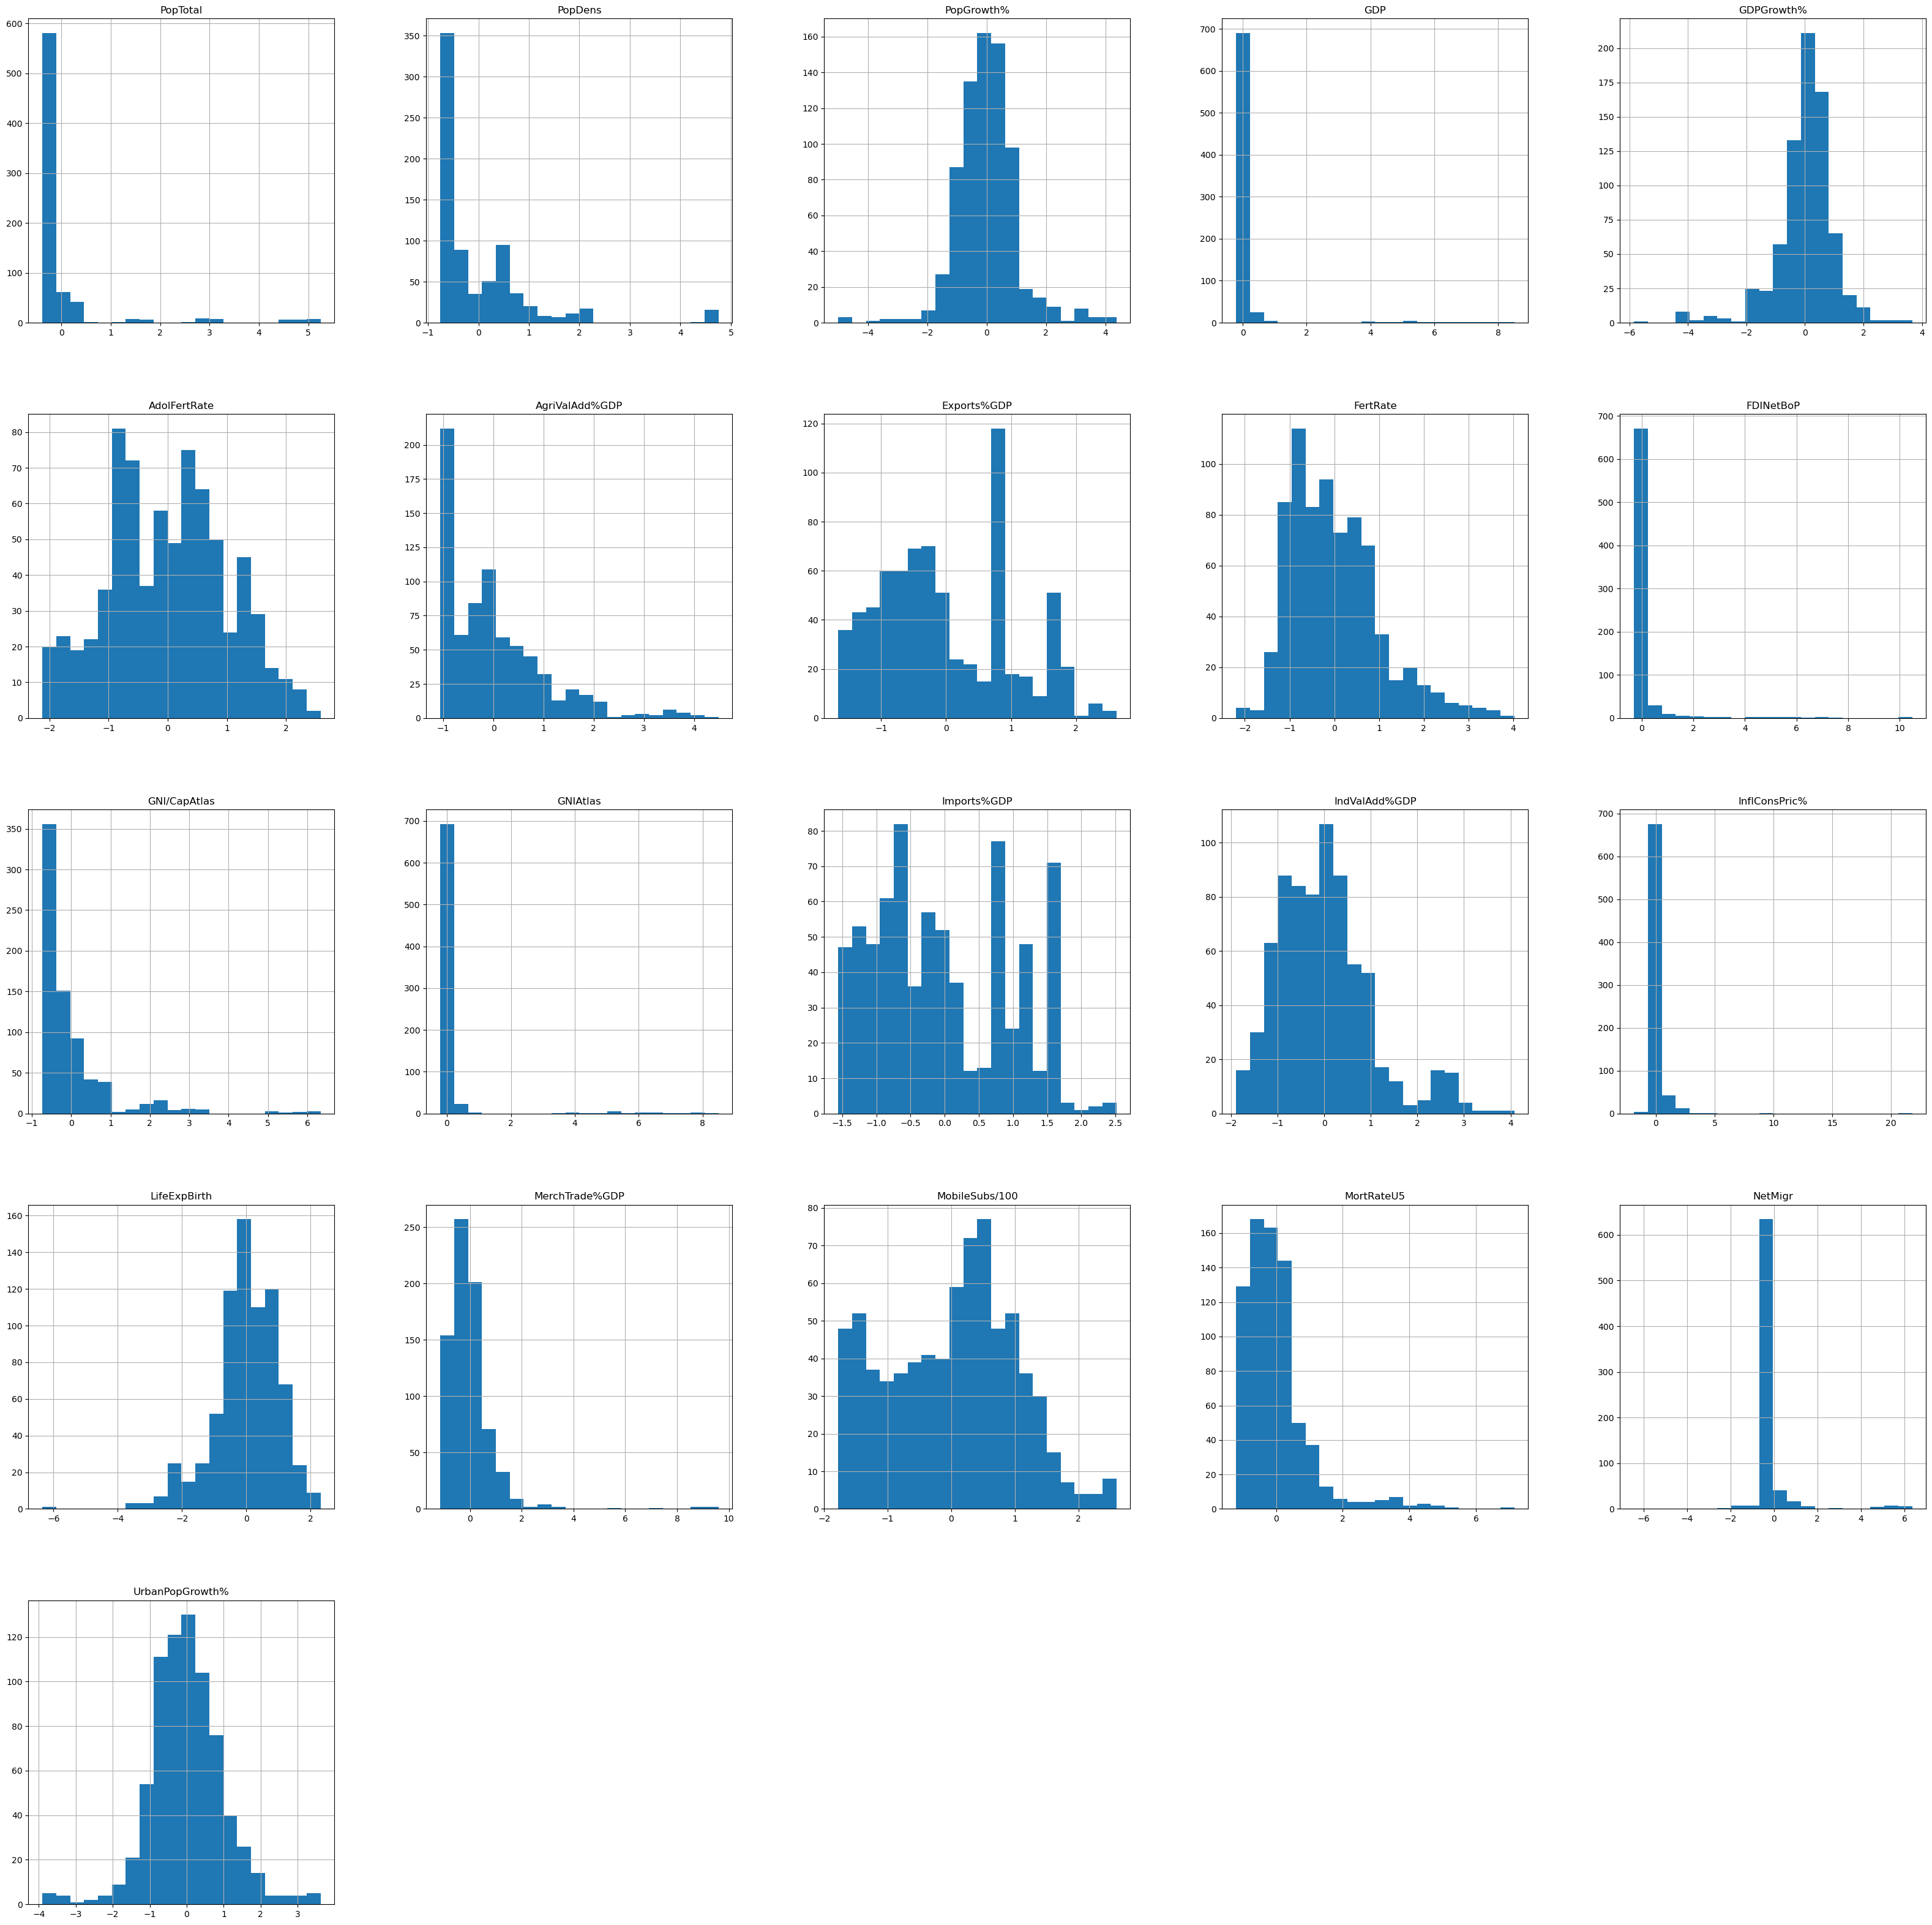

In [8]:
#Split data
train_set, test_set = train_test_split(americas_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)
test_set = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

#Normalize the features
scalered_train_set=scaler.fit_transform(train_set)
scalered_test_set=scaler.transform(test_set)

#Visualize the normalized features
train_set.hist(bins=20,figsize=(40,40))
plt.savefig("Normalized_Features.png")
plt.show()

C:\Users\nazno\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


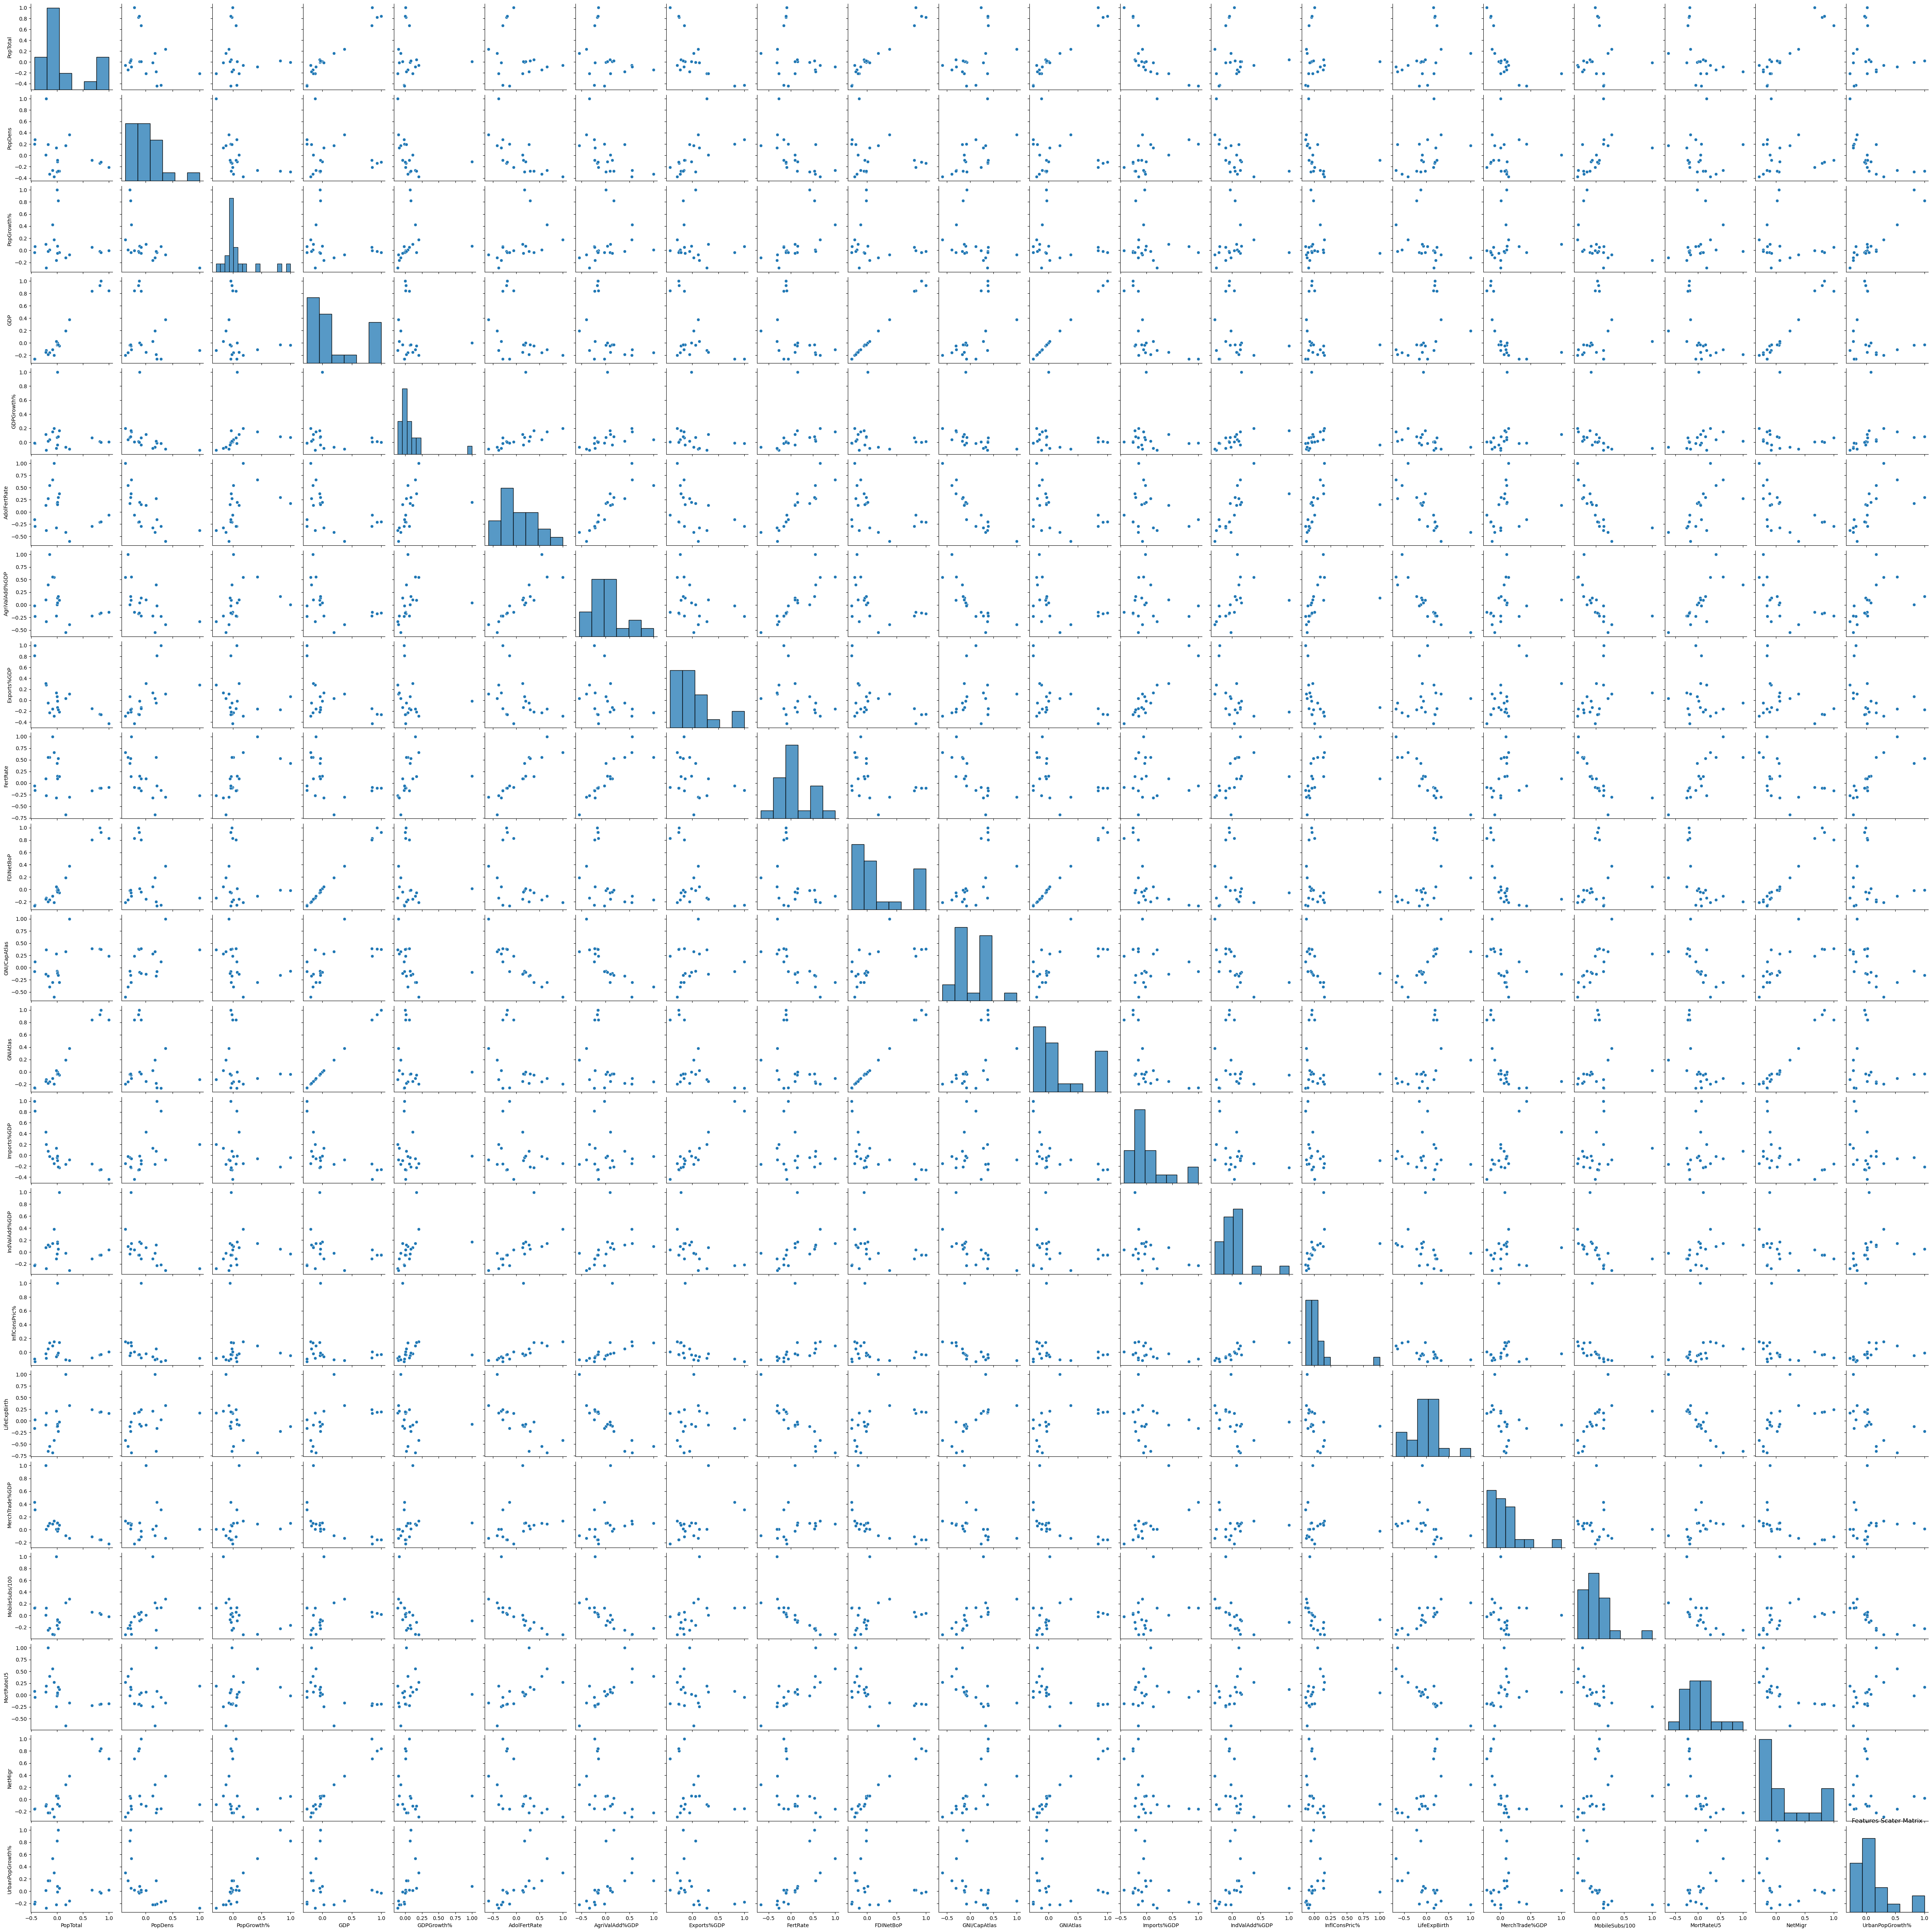

In [9]:
#Plot scatter matrix
sns.pairplot(americas_data_corr)
plt.title("Features Scater Matrix")
plt.savefig("Features_Scat.png", dpi = 300, bbox_inches = 'tight')
plt.show()

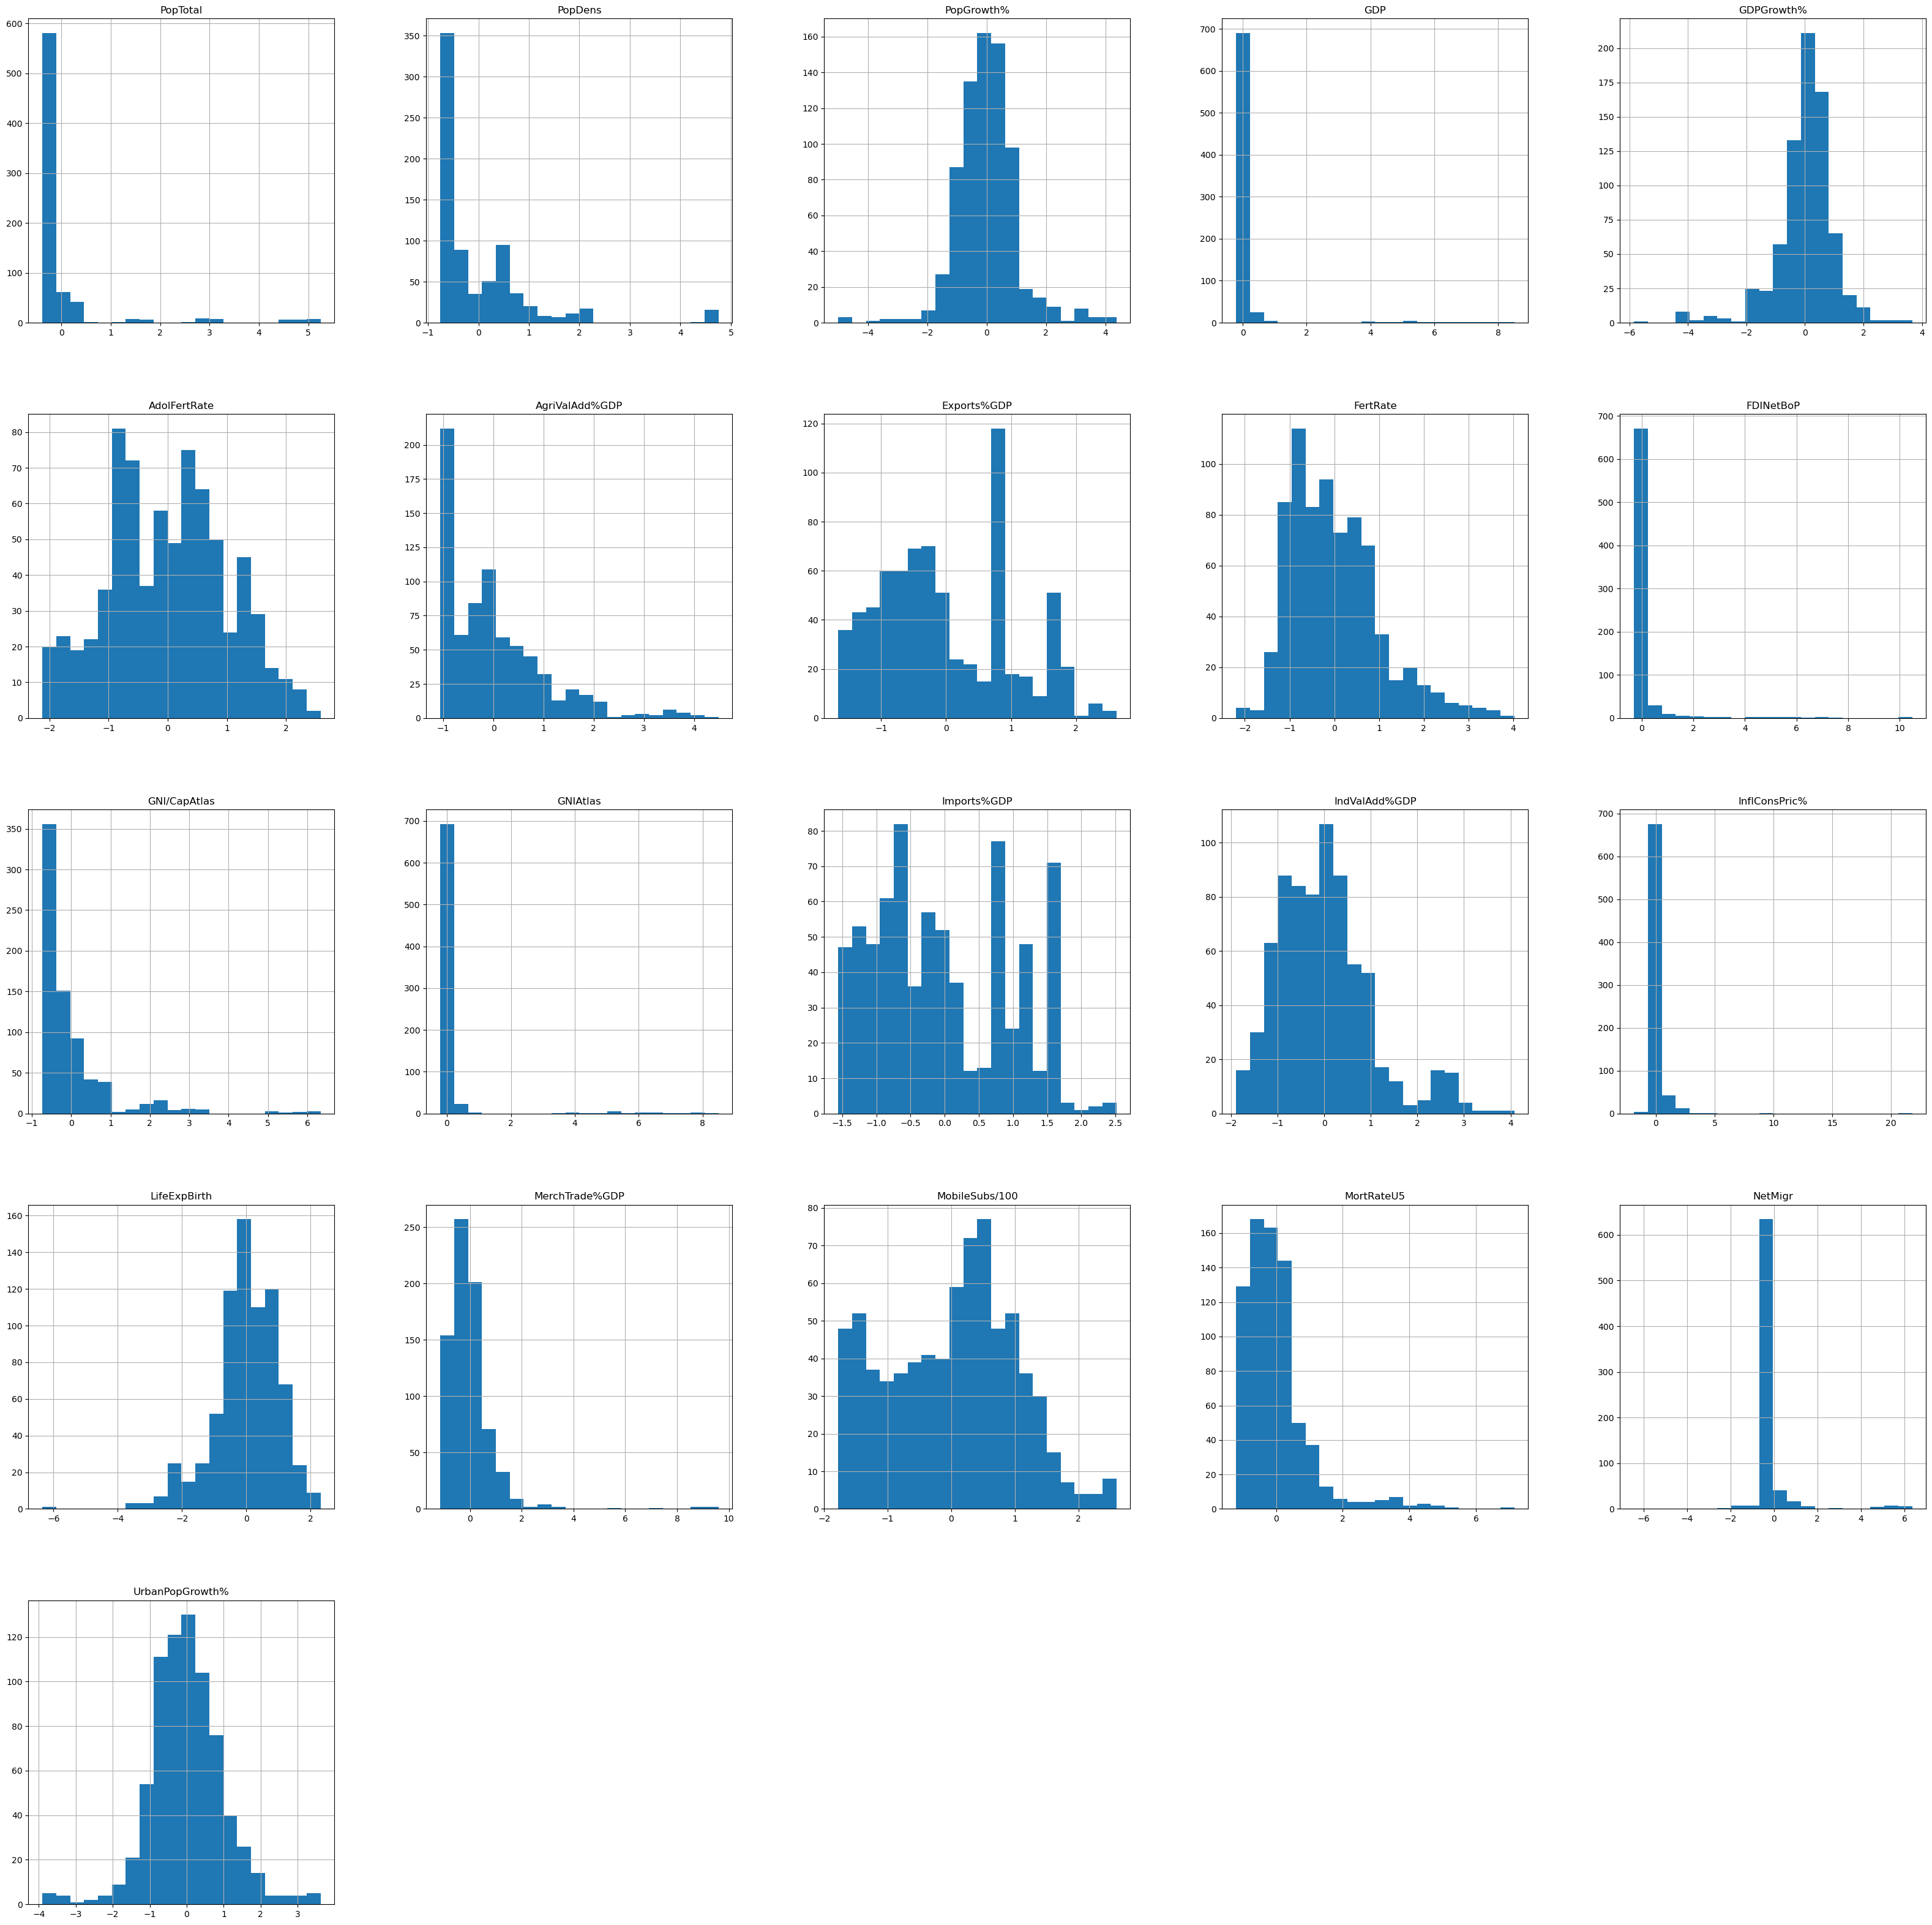

In [10]:
#Split data
train_set, test_set = train_test_split(americas_data, test_size=0.2, random_state=42)

scaler = StandardScaler()
train_set = pd.DataFrame(scaler.fit_transform(train_set), columns=train_set.columns)
test_set = pd.DataFrame(scaler.transform(test_set), columns=test_set.columns)

#Normalize the features
scalered_train_set=scaler.fit_transform(train_set)
scalered_test_set=scaler.transform(test_set)

#Visualize the normalized features
train_set.hist(bins=20,figsize=(40,40))
plt.savefig("Normalized_Features.png")
plt.show()

In [11]:
# Split data into features and target
X_train = train_set.drop(columns=['PopGrowth%'])
y_train = train_set['PopGrowth%']
X_test = test_set.drop(columns=['PopGrowth%'])
y_test = test_set['PopGrowth%']

In [12]:
# Define and evaluate models
models = {
    "Linear Regression": LinearRegression(),
    "Support Vector Regression": SVR(),
    "XGBoost": XGBRegressor(),
    "Random Forest Regressor": RandomForestRegressor()
}

for name, model in models.items():
    kFold = KFold(n_splits=10, shuffle=True, random_state=42)
    r2_scores = cross_val_score(model, X_train, y_train, cv=kFold, scoring='r2', error_score='raise')
    mse_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_squared_error')
    mae_scores = -cross_val_score(model, X_train, y_train, cv=kFold, scoring='neg_mean_absolute_error')
    print(f"{name}:")
    print("Cross-validation R^2 scores:", r2_scores)
    print("Mean R^2:", np.mean(r2_scores))
    print("Cross-validation MSE scores:", mse_scores)
    print("Mean MSE:", np.mean(mse_scores))
    print("Cross_validation MAE scores:", mae_scores)
    print("Mean MAE:", np.mean(mae_scores))
    print("\n")

Linear Regression:
Cross-validation R^2 scores: [0.8106999  0.82370521 0.83557106 0.78270624 0.7553629  0.80872085
 0.86242317 0.67712147 0.65499893 0.76357293]
Mean R^2: 0.7774882664140932
Cross-validation MSE scores: [0.16210374 0.23238009 0.20824776 0.21350999 0.20774437 0.17809208
 0.13397821 0.37220942 0.20872251 0.23881361]
Mean MSE: 0.21558017794718834
Cross_validation MAE scores: [0.29844566 0.31401478 0.31472332 0.31573182 0.32070253 0.32406558
 0.27239772 0.36290832 0.27283846 0.30879054]
Mean MAE: 0.3104618722415995


Support Vector Regression:
Cross-validation R^2 scores: [0.9166065  0.89722543 0.7597377  0.68983361 0.88029636 0.93132166
 0.9544484  0.82953078 0.96544224 0.91030477]
Mean R^2: 0.8734747440504457
Cross-validation MSE scores: [0.07141253 0.13547061 0.30429003 0.30476542 0.10165162 0.06394355
 0.0443601  0.19651431 0.02090713 0.09060063]
Mean MSE: 0.13339159312264015
Cross_validation MAE scores: [0.16487186 0.17873766 0.27471202 0.23444287 0.18493355 0.16907715

In [13]:
#Tese set performance
performance_results = {}
for name, model in models.items():
    # Fit the model to the entire training set
    model.fit(X_train, y_train)
    
    # Predict the test set
    y_pred = model.predict(X_test)
    
    # Calculate and print the R^2 score, MSE and MAE for the test set
    r2 = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    
    # Store the performance metrics
    performance_results[name] = {'R2 Score': r2, 'MSE': mse, 'MAE': mae}

# Sort the models based on R^2 score
sorted_models = sorted(performance_results.items(), key=lambda x: x[1]['R2 Score'], reverse=True)

print("Model Rankings based on R^2 Score:")
for idx, (model_name, metrics) in enumerate(sorted_models, start=1):
    print(f"{idx}. {model_name}: R^2 Score = {metrics['R2 Score']:.4f}, MSE = {metrics['MSE']:.4f}, MAE = {metrics['MAE']:.4f}")

Model Rankings based on R^2 Score:
1. XGBoost: R^2 Score = 0.9645, MSE = 0.0321, MAE = 0.0958
2. Random Forest Regressor: R^2 Score = 0.9638, MSE = 0.0328, MAE = 0.1004
3. Support Vector Regression: R^2 Score = 0.9011, MSE = 0.0895, MAE = 0.1809
4. Linear Regression: R^2 Score = 0.7077, MSE = 0.2645, MAE = 0.3381


Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.624132
0          PopTotal    0.109046
11      Imports%GDP    0.090014
6       Exports%GDP    0.047401
18          NetMigr    0.029352
1           PopDens    0.019463
5    AgriValAdd%GDP    0.016507
10         GNIAtlas    0.015328
15   MerchTrade%GDP    0.008817
17       MortRateU5    0.007427
4      AdolFertRate    0.006184
7          FertRate    0.005407
9      GNI/CapAtlas    0.004454
14     LifeExpBirth    0.003746
2               GDP    0.003375
12    IndValAdd%GDP    0.003220
16   MobileSubs/100    0.002523
8         FDINetBoP    0.002052
13    InflConsPric%    0.000959
3        GDPGrowth%    0.000592


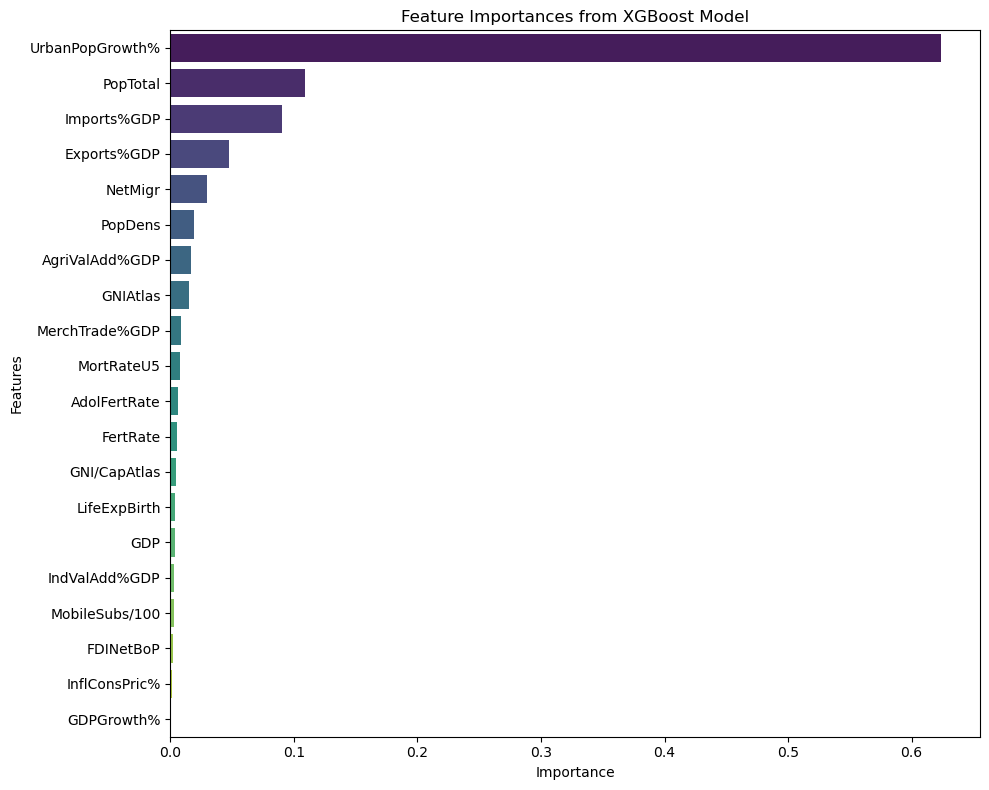

In [18]:
# Fit the model to the entire training set
best_model = models[sorted_models[0][0]]  # Select the best performing model
best_model.fit(X_train, y_train)

# Extract feature importances
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

# Plotting
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Feature Importances from XGBoost Model.png")
plt.show()

In [19]:
from sklearn.model_selection import GridSearchCV

# Initialize the XGBRegressor
xgb_model = XGBRegressor(random_state=42)

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7, 9],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.7, 0.8, 0.9],
    'colsample_bytree': [0.7, 0.8, 0.9]
}

# Setup the GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=10, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train, y_train)

# Best parameters and score
print("Best parameters found: ", grid_search.best_params_)
print("Best cross-validation score (MSE): ", -grid_search.best_score_)


Fitting 10 folds for each of 324 candidates, totalling 3240 fits
Best parameters found:  {'colsample_bytree': 0.9, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 300, 'subsample': 0.9}
Best cross-validation score (MSE):  0.039265087612680646


In [20]:
# Evaluate the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Test MSE: ", mse)
print("Test R^2 Score: ", r2)


Test MSE:  0.024820614144662027
Test R^2 Score:  0.972574978812113


In [21]:
# Extract feature importancesi
feature_importances = best_model.feature_importances_

# Create a DataFrame to hold feature importances
importance_df = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importances})

# Sort features based on importance
importance_df = importance_df.sort_values(by='Importance', ascending=False)
print("Feature Importances:")
print(importance_df)

Feature Importances:
            Feature  Importance
19  UrbanPopGrowth%    0.425561
0          PopTotal    0.150147
11      Imports%GDP    0.065428
18          NetMigr    0.057962
6       Exports%GDP    0.057606
17       MortRateU5    0.048642
2               GDP    0.045689
7          FertRate    0.043253
1           PopDens    0.022288
15   MerchTrade%GDP    0.016261
5    AgriValAdd%GDP    0.011874
12    IndValAdd%GDP    0.009597
9      GNI/CapAtlas    0.008989
8         FDINetBoP    0.008149
4      AdolFertRate    0.007651
10         GNIAtlas    0.007302
14     LifeExpBirth    0.005141
3        GDPGrowth%    0.003136
13    InflConsPric%    0.002869
16   MobileSubs/100    0.002457


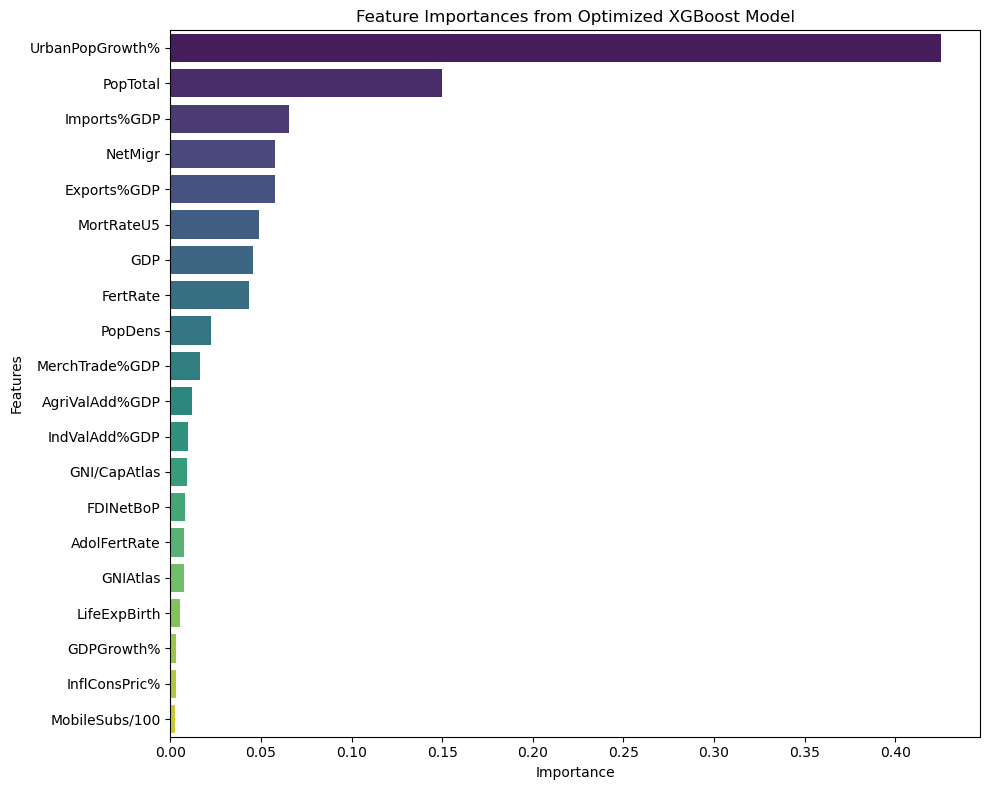

In [22]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'importance_df' is already defined and sorted as you described
plt.figure(figsize=(10, 8))
sns.barplot(x="Importance", y="Feature", data=importance_df, palette="viridis")
plt.title('Feature Importances from Optimized XGBoost Model')
plt.xlabel('Importance')
plt.ylabel('Features')
plt.tight_layout()
plt.savefig("Optimized_Feature_Importances.png")
plt.show()